<h1> FUNDAMENTAL ANALYSIS USING REGRESSION </h1>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

Import the file 'gold.csv' (you will find this in the intro section to download or in '/Commodities/gold.csv' if you are using the jupyter notebook), which contains the data of the last 2 years price action of Indian (MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'. One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial function of the same inputs. Also, one of the 2 columns is partially filled.

In [7]:
df=pd.read_csv('Commodities/GOLD.csv')
df['Date']=pd.to_datetime(df['Date'])
df.head()


,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [8]:
ind=df[df['Pred'].isna()].index #index
x=df.iloc[0:ind[0],0:5]# independent variables
y=df.iloc[0:ind[0],7]#dependent variable
x_pred=df.iloc[ind[0]:,1:5] #values to be predicted 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train2=x_train.iloc[:,1:5]
x_test2=x_test.iloc[:,1:5]


In [9]:
lr=LinearRegression()
lr.fit(x_train2,y_train)
pred=lr.predict(x_test2)
lr.coef_

array([ 2.,  3., -1., -4.])

In [10]:
lr.intercept_

3.12070369545836e-11

In [11]:
print(r2_score(y_test,pred))

1.0


In [12]:
print(mean_squared_error(y_test,pred))

1.364330186922221e-22


In [13]:
predictions=lr.predict(x_pred)
predictions

array([ 852.,  422.,  530.,  144.,  415., 1103.,  411.,  613.,    5.,
        547.,  -27.,  368.,  263.,  615.,  479.,  -82.,  489., 2890.,
        340.,  274.,  469.,  487.,  -48.,  364.,    7.,  277.,  283.,
        550.,  110.,  413.,  146.,  241.,  406.,  119.,  405.,  303.,
        154.,  679., 2111.,  860.,  -37.,  615.,  468.,  716.,  410.,
        251.,  466.,  254.,  109.,  470.,  241.,  776.,  471.,  555.,
       -139.,  224.,  603., 3024.,  331., 2895.,  476.,  589.,  233.,
        670.,  152.,   32.,  960.,  359.,  595.,  439.,  586.,   93.,
        741.,  466.,  502.,  159.,  833.,  378.,    6.,  694.,  518.,
        554.,  517.,  202.,  338.,  489., 1070.,   -8.,  579.,  468.,
        223.,  264., -132.,  350.,  359.,  446.,  535.,  438.,  269.,
        601.,  280.])

In [14]:
predictions=predictions.round(2)
y=list(y)
predictions=list(predictions)
y.extend(predictions)
df['Pred']=y

In [15]:
df_test = x_test
df_test["Pred"] = y_test
df_test["Pred_New"] = pred
df_test = df_test.reset_index()
df_test = df_test.sort_values(by=["index"])
df_test = df_test.set_index("index")
df_test=df_test.set_index('Date')
df_test

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Price,Open,High,Low,Pred,Pred_New
Date,,,,,,
2017-05-05,28184,28136,28382,28135,-146.0,-146.0
2017-05-10,28007,28060,28146,27981,124.0,124.0
2017-05-11,28022,27995,28100,27945,149.0,149.0
2017-05-12,28019,28088,28195,27985,167.0,167.0
2017-05-15,28008,28049,28157,27996,22.0,22.0
...,...,...,...,...,...,...
2018-10-31,31631,31650,31780,31590,72.0,72.0
2018-11-05,31783,31785,31898,31630,503.0,503.0
2018-11-23,30513,30551,30566,30427,405.0,405.0


C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


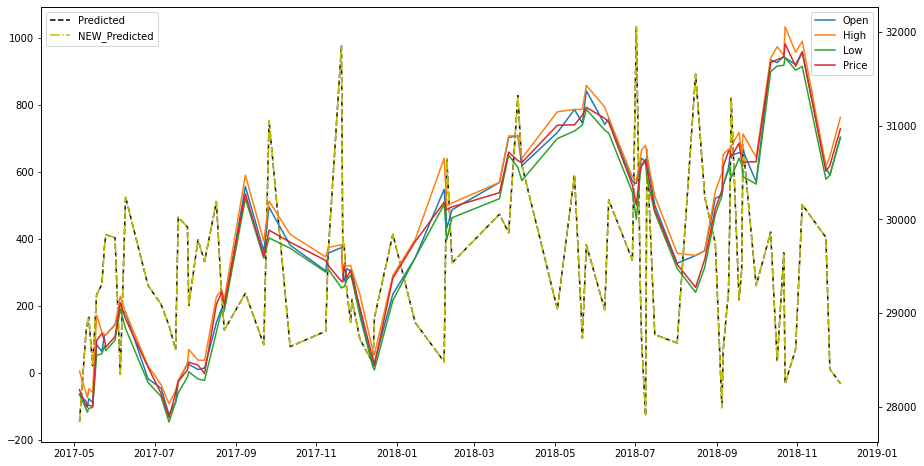

In [16]:
fig = plt.figure(figsize = (15, 8))
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()

ax2.plot(df_test["Open"], label="Open")
ax2.plot(df_test["High"], label="High")
ax2.plot(df_test["Low"], label="Low")
ax2.plot(df_test["Price"], label="Price")
ax1.plot(df_test["Pred"], label = "Predicted", color = "black", linestyle = "--")
ax1.plot(df_test["Pred_New"], label = "NEW_Predicted", color = "y", linestyle = "-.")
ax1.legend(loc = "upper left")
ax2.legend(loc = "upper right")



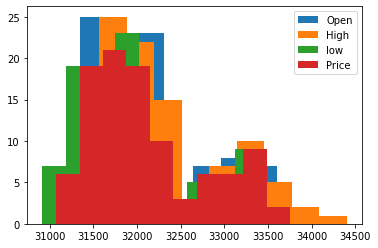

In [17]:
x_pred['Predictions']=predictions
fig=plt.figure()
ax1 = fig.add_subplot(1, 1, 1)


ax1.hist( x_pred['Open'], label='Open' ); 
ax1.hist(x_pred['High'],  label='High' );  
ax1.hist( x_pred['Low'],  label='low' );  
ax1.hist( x_pred['Price'],   label='Price' );   


ax1.legend()


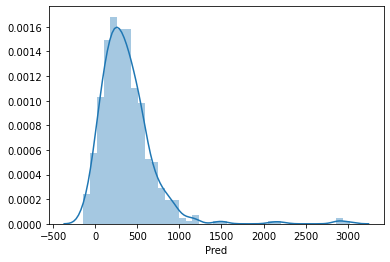

In [18]:
sns.distplot(df["Pred"])

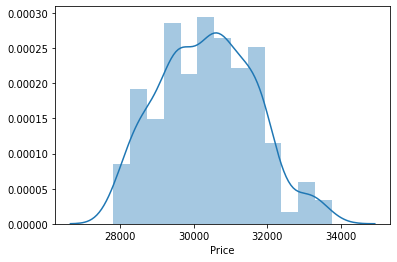

In [19]:
sns.distplot(df['Price'])

In [13]:
#Second part

In [20]:
from sklearn.preprocessing import PolynomialFeatures


In [21]:
X=df.iloc[:,0:5]
Y=df.iloc[:,8]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=0)
x_train2=x_train.iloc[:,1:5]
x_test2=x_test.iloc[:,1:5]


In [22]:
lr.fit(x_train2,y_train)
lin_pred=lr.predict(x_test2)
r2_score(y_test,lin_pred)

0.9999901742208236

In [23]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train2)
#poly.fit(x_poly,y_train)
lr=LinearRegression()
lr.fit(x_poly,y_train)
new_pred=lr.predict(poly.fit_transform(x_test2))


In [24]:
print(r2_score(y_test,new_pred))

0.9999999892837593


In [25]:
df_new = x_test
df_new["actual_new"] = y_test
df_new["Pred_Linear"] = lin_pred
df_new['Pred_Poly']=new_pred
df_new = df_new.reset_index()
df_new = df_new.sort_values(by=["index"])
df_new = df_new.set_index("index")
df_new=df_new.set_index('Date')

df_new


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,Price,Open,High,Low,actual_new,Pred_Linear,Pred_Poly
Date,,,,,,,
2017-05-05,28184,28136,28382,28135,295.430176,295.461223,295.422148
2017-05-18,28710,28666,28980,28551,475.389093,475.762353,475.392448
2017-05-22,28783,28590,28799,28568,425.738484,426.504781,425.782111
2017-05-25,28638,28769,28770,28600,39.225874,38.837770,39.210185
2017-06-02,28949,28685,29011,28680,598.104568,598.717867,598.125608
...,...,...,...,...,...,...,...
2019-03-18,31685,31800,31815,31590,110.676638,110.624562,110.675175
2019-03-26,32113,32200,32200,32031,82.432643,82.147125,82.444527
2019-04-05,31566,31535,31620,31400,252.163057,252.561601,252.156049


No handles with labels found to put in legend.


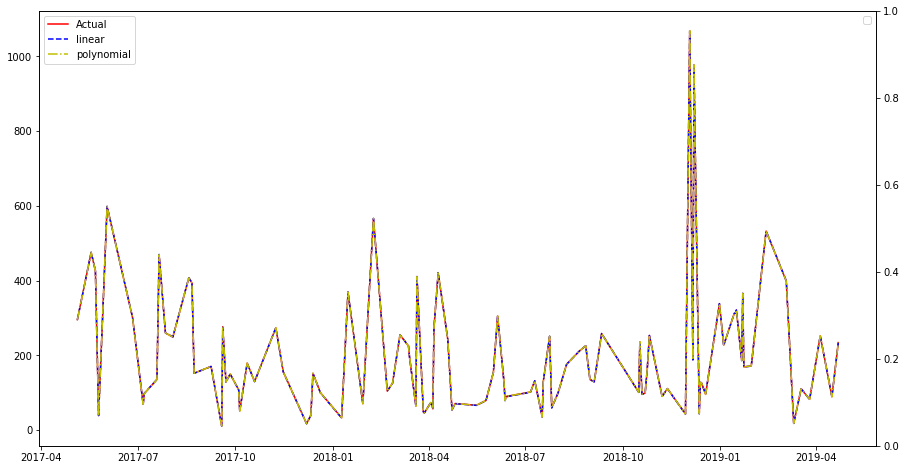

In [20]:
fig = plt.figure(figsize = (15, 8))
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()

#ax2.plot(df_new["Open"], label="Open")
#ax2.plot(df_new["High"], label="High")
#ax2.plot(df_new["Low"], label="Low")
#ax2.plot(df_new["Price"], label="Price")
ax1.plot(df_new["actual_new"], label = "Actual", color = "r")
ax1.plot(df_new["Pred_Linear"], label = "linear", color = "b", linestyle = "--")
ax1.plot(df_new["Pred_Poly"], label = "polynomial", color = "y", linestyle = "-.")
ax1.legend(loc = "upper left")
ax2.legend(loc = "upper right")


<b>Using linear regression (OLS), calculate

The daily Beta value for the past 3 months. (Daily = Daily returns)
The monthly Beta value. (Monthly= Monthly returns)
Then answer:


Attempt the question using regression. (Regression Reference)
Were the Beta values more or less than 1 ?
What if it was negative ? Discuss.
Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results<b>


In [26]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import train_test_split


In [27]:
Infosys = pd.read_csv("INFY.csv", parse_dates=["Date"], index_col = "Date")
Infosys = Infosys[Infosys.Series=="EQ"]
Nifty50 = pd.read_csv("Nifty50/Nifty50.csv", parse_dates=["Date"], index_col = "Date")



In [28]:
Infosys.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,INFY,EQ,964.25,963.5,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67
2017-05-16,INFY,EQ,951.55,953.1,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62
2017-05-17,INFY,EQ,955.00,951.6,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35
2017-05-18,INFY,EQ,952.80,943.0,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32
2017-05-19,INFY,EQ,961.75,961.5,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48


In [29]:
Nifty50.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [30]:

close_prices=pd.concat([Infosys['Close Price'],Nifty50['Close']],axis=1)
close_prices.columns=['INFY','Nifty50']
close_prices.head()

,INFY,Nifty50
Date,,
2017-05-15,951.55,9445.40
2017-05-16,955.00,9512.25
2017-05-17,952.80,9525.75
2017-05-18,961.75,9429.45
2017-05-19,957.95,9427.90


In [31]:
price_returns=close_prices.tail(90).pct_change().dropna(axis=0)
price_returns.head()

,INFY,Nifty50
Date,,
2019-01-01,0.009257,0.004377
2019-01-02,0.006015,-0.010779
2019-01-03,0.000149,-0.011142
2019-01-04,-0.012105,0.005163
2019-01-07,0.016111,0.004144


In [32]:
X=price_returns['Nifty50']
Y=price_returns['INFY']
X1=sm.add_constant(X)

model = OLS( Y, X1 )
model.fit().summary()


C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   INFY   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     12.61
Date:                Fri, 25 Sep 2020   Prob (F-statistic):           0.000623
Time:                        19:00:19   Log-Likelihood:                 269.57
No. Observations:                  89   AIC:                            -535.1
Df Residuals:                      87   BIC:                            -530.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.001      0.689      0.493      -0.002       0.003
Nifty50        0.6490      0.183      3.551      0.001       0.286       1.012
==============================================================================
Omnibus:                        0.108   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.947   Jarque-Bera (JB):                0.138
Skew:                          -0.077   Prob(JB):                        0.933
Kurtosis:                       2.885   Cond. No.                         146.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h4> Infosys Beta value = 0.6490, which is less than 1 </h4>
<h4> If Beta value is lower than 1, it indicates that a stock's price is steadier than most stocks.</h4>


In [33]:
Nifty50['month']    = Nifty50.index.map(   lambda date: f"{date.year}-{date.month}")
Infosys['month'] = Infosys.index.map(lambda date: f"{date.year}-{date.month}")
Nifty50_monthly = Nifty50.groupby('month').last()
Infosys_monthly = Infosys.groupby('month').last()


In [34]:
returns_monthly = pd.concat([ Infosys_monthly['Close Price'], Nifty50_monthly['Close'] ], axis=1).pct_change().dropna()
returns_monthly.columns = ['Infosys', 'NIFTY50']
returns_monthly.head()


,Infosys,NIFTY50
month,,
2017-11,0.058849,-0.010522
2017-12,0.067565,0.029741
2017-5,-0.062377,-0.086362
2017-6,-0.042475,-0.010430
2017-7,0.080862,0.058419


In [35]:
X  = returns_monthly['NIFTY50']
Y  = returns_monthly['Infosys']
X1 = sm.add_constant(X)

model = OLS( Y, X1 )
model.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Infosys   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2.906
Date:                Fri, 25 Sep 2020   Prob (F-statistic):              0.102
Time:                        19:00:24   Log-Likelihood:                 4.0508
No. Observations:                  24   AIC:                            -4.102
Df Residuals:                      22   BIC:                            -1.745
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0064      0.044      0.146      0.885      -0.084       0.097
NIFTY50        1.5221      0.893      1.705      0.102      -0.330       3.374
==============================================================================
Omnibus:                       32.464   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.233
Skew:                           2.251   Prob(JB):                     1.72e-22
Kurtosis:                      11.943   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h3>Question : What if it(beta) was negative? </h3> 
<h5>Answer : If beta is less than 0, it will indicate an inverse relation to the market, this is possible but highly unlikely.</h5> 


<h3> Summary : </h3>
<h6> Beta Value for both cases : </h6>
<h6> Beta value for Daily Returns in last 3 months = 0.6490 </h6>
<h6> Beta value for monthly returns = 0.0117 </h6>
<h6> Both the Beta values are less than one, which means that the Infosys stock is more steadier than most of the stocks and also depicts that Infosys Stock can be considered less risky. This shows that Infosys stock is less volatile and hence it swings less as compared to the market in general. </h6>


In [ ]:
#The linear regression results suggests that the "pred" column in the gold.csv is a linear combinbation of OHLC and that is 
#why linear regression gave accurate results. The r2_score observed was 1.0 which is quite perfect.
#The predictions were exact and accurate.

#while the "new" column is a polynomial function of open,close,high and low.
#The polynomial regression gave better results when compared to linear regression in case of "new" column
#However the r2_score achieved in both the methods was quite close which was around 0.999




